# Fuse multiple chunks and run the Poisson reconstruction

This notebook aims at fusing a few chunks of data together and creating a mesh using screened Poisson reconstruction.

We start by importing a few libraries, then plotting the cropping boxes. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


import cloudComPy as cc # cloud compare python interface.
if cc.isPluginCanupo():
    import cloudComPy.Canupo

if cc.isPluginPCL():
    import cloudComPy.PCL
from osgeo import gdal, ogr, osr
from subprocess import run

import json

import os
from yaml import load
from yaml.loader import Loader

from helpers.utils import plot_segmentation_scheme

In [2]:
caveName = "15_CotepatiereCocaliere"
SCAN = 0
root = f"../../real_data/{caveName}"

PROCESSING_FILEPATH = os.path.join(root, "params.yaml")
p = load(open(PROCESSING_FILEPATH), Loader)

SCAN_NAME = p['paths']['scanNames'][SCAN]
shift = p["alignment"]["globalShift"]

In [3]:
SCAN_NAME

'CotepatiereCocaliere'

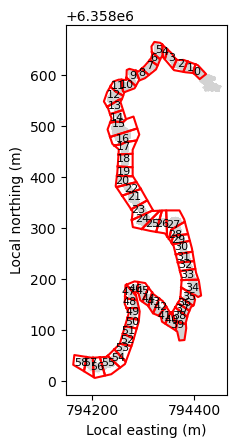

In [4]:
fig, ax = plt.subplots()

ax, res = plot_segmentation_scheme(root, ax, scan=SCAN)

plt.xlabel("Local easting (m)")
plt.ylabel("Local northing (m)")

plt.savefig(os.path.normpath(os.path.join(root, "output", f"{SCAN_NAME}_SegmentationScheme.png")), dpi = 300)
plt.show()

In [5]:
# now select the segments we want to fuse together. 
SEGMENTS = np.arange(0,15)

toBeFused = list(SEGMENTS)

suffix = [str(i) for i in toBeFused]

In [6]:
fp = os.path.normpath(os.path.join(root, "process/cropped_clouds", "{scan_name}_Cropped_{i}_normals_reoriented.ply"))

In [7]:
paths = [fp.format(i=i, scan_name = SCAN_NAME) for i in toBeFused]

In [8]:
print(paths)

['..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_0_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_1_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_2_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_3_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_4_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_5_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_6_normals_reoriented.ply', '..\\..\\real_data\\15_CotepatiereCocaliere\\process\\cropped_clouds\\CotepatiereCocaliere_Cropped_7_normals_reorient

In [9]:
shift = [0, 0, 0]

In [10]:
clouds = [cc.loadPointCloud(fp,  cc.CC_SHIFT_MODE.XYZ, 0, *shift) for fp in paths]

In [11]:
merged = cc.MergeEntities(clouds, deleteOriginalClouds= True, createSFcloudIndex= False)

In [12]:
ret = cc.SavePointCloud(merged, os.path.join(root, f"output/{SCAN_NAME}_Part1.ply"))